In [59]:
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
import time
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vehicle-number-plate-detection/Indian_Number_plates.json


In [60]:
df = pd.read_json("/kaggle/input/vehicle-number-plate-detection/Indian_Number_plates.json", lines=True)
df.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [ ]:
os.mkdir("Indian Number Plates")

In [ ]:
dataset = dict()
dataset["image_name"] = list()
dataset["image_width"] = list()
dataset["image_height"] = list()
dataset["top_x"] = list()
dataset["top_y"] = list()
dataset["bottom_x"] = list()
dataset["bottom_y"] = list()

counter = 0
for index, row in df.iterrows():
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')
    img.save("Indian Number Plates/licensed_car{}.jpeg".format(counter), "JPEG")
    
    dataset["image_name"].append("licensed_car{}".format(counter))
    
    data = row["annotation"]
    
    dataset["image_width"].append(data[0]["imageWidth"])
    dataset["image_height"].append(data[0]["imageHeight"])
    dataset["top_x"].append(data[0]["points"][0]["x"])
    dataset["top_y"].append(data[0]["points"][0]["y"])
    dataset["bottom_x"].append(data[0]["points"][1]["x"])
    dataset["bottom_y"].append(data[0]["points"][1]["y"])
    
    counter += 1
print("Downloaded {} car images.".format(counter))

In [61]:
dataset

{'image_name': ['licensed_car0',
  'licensed_car1',
  'licensed_car2',
  'licensed_car3',
  'licensed_car4',
  'licensed_car5',
  'licensed_car6',
  'licensed_car7',
  'licensed_car8',
  'licensed_car9',
  'licensed_car10',
  'licensed_car11',
  'licensed_car12',
  'licensed_car13',
  'licensed_car14',
  'licensed_car15',
  'licensed_car16',
  'licensed_car17',
  'licensed_car18',
  'licensed_car19',
  'licensed_car20',
  'licensed_car21',
  'licensed_car22',
  'licensed_car23',
  'licensed_car24',
  'licensed_car25',
  'licensed_car26',
  'licensed_car27',
  'licensed_car28',
  'licensed_car29',
  'licensed_car30',
  'licensed_car31',
  'licensed_car32',
  'licensed_car33',
  'licensed_car34',
  'licensed_car35',
  'licensed_car36',
  'licensed_car37',
  'licensed_car38',
  'licensed_car39',
  'licensed_car40',
  'licensed_car41',
  'licensed_car42',
  'licensed_car43',
  'licensed_car44',
  'licensed_car45',
  'licensed_car46',
  'licensed_car47',
  'licensed_car48',
  'licensed_car4

In [62]:
df = pd.DataFrame(dataset)
df.head()

,image_name,image_width,image_height,top_x,top_y,bottom_x,bottom_y
0,licensed_car0,806,466,0.722084,0.587983,0.868486,0.688841
1,licensed_car1,494,449,0.161943,0.850780,0.582996,1.000000
2,licensed_car2,500,314,0.082000,0.697452,0.230000,0.828025
3,licensed_car3,500,469,0.434000,0.667377,0.718000,0.765458
4,licensed_car4,1001,563,0.208791,0.390764,0.865135,0.984014


In [63]:
df.to_csv("indian_license_plates.csv", index=False)

In [64]:
df = pd.read_csv("indian_license_plates.csv")
df["image_name"] = df["image_name"] + ".jpeg"
df.drop(["image_width", "image_height"], axis=1, inplace=True)
df.head()

,image_name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.jpeg,0.722084,0.587983,0.868486,0.688841
1,licensed_car1.jpeg,0.161943,0.850780,0.582996,1.000000
2,licensed_car2.jpeg,0.082000,0.697452,0.230000,0.828025
3,licensed_car3.jpeg,0.434000,0.667377,0.718000,0.765458
4,licensed_car4.jpeg,0.208791,0.390764,0.865135,0.984014


In [65]:
lucky_test_samples = np.random.randint(0, len(df), 5)
reduced_df = df.drop(lucky_test_samples, axis=0)

In [66]:
len(lucky_test_samples)

5

In [67]:
len(reduced_df)

232

In [68]:
WIDTH = 224
HEIGHT = 224
CHANNEL = 3

def show_img(index):
    image = cv2.imread("Indian Number Plates/" + df["image_name"].iloc[index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(WIDTH, HEIGHT))

    tx = int(df["top_x"].iloc[index] * WIDTH)
    ty = int(df["top_y"].iloc[index] * HEIGHT)
    bx = int(df["bottom_x"].iloc[index] * WIDTH)
    by = int(df["bottom_y"].iloc[index] * HEIGHT)

    image = cv2.rectangle(image, (tx, ty), (bx, by), (0, 0, 255), 1)
    plt.imshow(image)
    plt.show()

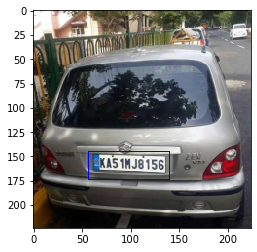

In [69]:
show_img(5)

In [70]:
reduced_df.head()

,image_name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.jpeg,0.722084,0.587983,0.868486,0.688841
1,licensed_car1.jpeg,0.161943,0.850780,0.582996,1.000000
2,licensed_car2.jpeg,0.082000,0.697452,0.230000,0.828025
3,licensed_car3.jpeg,0.434000,0.667377,0.718000,0.765458
4,licensed_car4.jpeg,0.208791,0.390764,0.865135,0.984014


In [71]:
lucky_test_samples

array([174, 227, 156,  18, 150])

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [146]:

# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 4)                 260       
Total params: 17,938,756
Trainable params: 3,224,068
N

In [147]:
data = []
for idx, row in reduced_df.iterrows():
    img = cv2.resize(cv2.imread("Indian Number Plates/" + row['image_name']) / 255.0, dsize=(WIDTH, HEIGHT))
    data.append(img)
data = np.array(data)
data.shape

(232, 224, 224, 3)

In [148]:
X_train, X_validate = data[:210], data[210:]
X_train.shape, X_validate.shape

((210, 224, 224, 3), (22, 224, 224, 3))

In [149]:
adam = Adam(lr=0.0005)
model.compile(optimizer=adam, loss="mse")

In [150]:
y_data = []
for idx, row in reduced_df.iterrows():
    y_data.append([row['top_x'], row['top_y'], row['bottom_x'], row['bottom_y']])
y_data = np.array(y_data)
y_data

array([[0.72208437, 0.58798283, 0.86848635, 0.6888412 ],
       [0.16194332, 0.85077951, 0.58299595, 1.        ],
       [0.082     , 0.69745223, 0.23      , 0.82802548],
       [0.434     , 0.6673774 , 0.718     , 0.76545842],
       [0.20879121, 0.39076377, 0.86513487, 0.98401421],
       [0.25480769, 0.64965197, 0.62740385, 0.77726218],
       [0.41197822, 0.52967033, 0.80580762, 0.69230769],
       [0.48545455, 0.46182495, 0.72      , 0.59590317],
       [0.41075795, 0.45371429, 0.56886716, 0.51657143],
       [0.41320293, 0.39710145, 0.58679707, 0.62318841],
       [0.31152648, 0.345     , 0.65732087, 0.5475    ],
       [0.33984375, 0.49154746, 0.48730469, 0.56827048],
       [0.3359375 , 0.42758621, 0.6828125 , 0.54942529],
       [0.18      , 0.41573034, 0.44363636, 0.62921348],
       [0.302     , 0.38867925, 0.72      , 0.70188679],
       [0.35400517, 0.53582555, 0.66795866, 0.67133956],
       [0.37971391, 0.61870504, 0.63589077, 0.76738609],
       [0.12820513, 0.59016393,

In [151]:
Y_train,Y_Validate = y_data[:210], y_data[210:]

In [152]:
Y_train.shape, Y_Validate.shape

((210, 4), (22, 4))

In [153]:
history = model.fit(X_train, Y_train, validation_data=(X_validate, Y_Validate), epochs=30, batch_size=21)

Train on 210 samples, validate on 22 samples
Epoch 1/30
210/210 [==============================] - 43s 203ms/step - loss: 0.0338 - val_loss: 0.0247
Epoch 2/30
210/210 [==============================] - 44s 208ms/step - loss: 0.0147 - val_loss: 0.0083
Epoch 3/30
210/210 [==============================] - 43s 203ms/step - loss: 0.0066 - val_loss: 0.0079
Epoch 4/30
210/210 [==============================] - 42s 199ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 5/30
210/210 [==============================] - 43s 203ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 6/30
210/210 [==============================] - 42s 202ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 7/30
210/210 [==============================] - 42s 200ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 8/30
210/210 [==============================] - 54s 259ms/step - loss: 8.2766e-04 - val_loss: 0.0043
Epoch 9/30
210/210 [==============================] - 43s 203ms/step - loss: 5.4676e-04 - val_loss: 0.0044
Epoch 10/30
210/210 

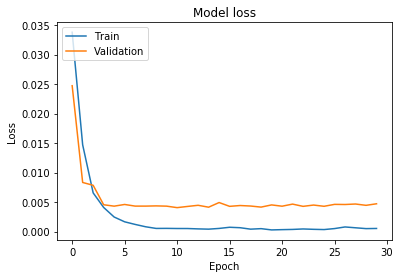

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

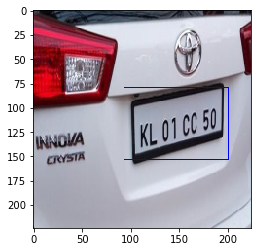

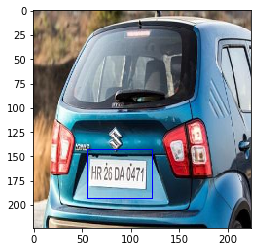

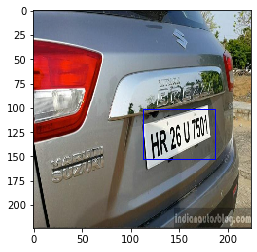

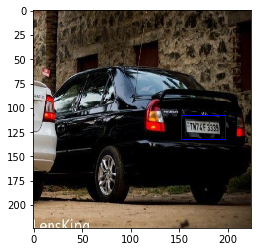

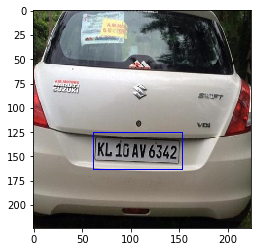

((5, 224, 224, 3), (5, 4))

In [155]:
X_test = []
Y_test = []
for idx, row in df.iloc[lucky_test_samples].iterrows():
    img = cv2.resize(cv2.imread("Indian Number Plates/" + row['image_name']) / 255.0, dsize=(WIDTH, HEIGHT))
    X_test.append(img)
    Y_test.append([row['top_x'], row['top_y'], row['bottom_x'], row['bottom_y']])
    show_img(idx)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test.shape, Y_test.shape

In [156]:
model.evaluate(X_validate, Y_Validate, batch_size=1)

22/22 [==============================] - 4s 179ms/step


0.004724336235085502

In [157]:
model.evaluate(X_test, Y_test, batch_size=1)

5/5 [==============================] - 1s 178ms/step


0.012561258301138878

In [158]:
Y_hat = model.predict(X_test)

In [159]:
Y_hat.shape

(5, 4)

In [160]:
def show_test_image(img, y_hat):
    tx = int(y_hat[0] * WIDTH)
    ty = int(y_hat[1] * HEIGHT)
    bx = int(y_hat[2] * WIDTH)
    by = int(y_hat[3] * HEIGHT)
    img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)
    image = cv2.rectangle(img, (tx, ty), (bx, by), (0, 0, 255), 1)
    plt.imshow(image)
    plt.show()

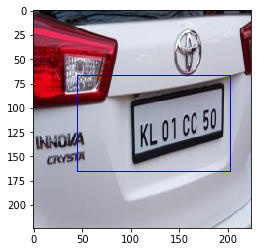

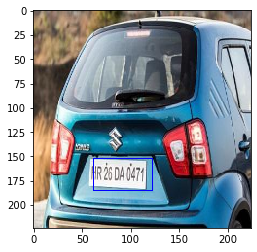

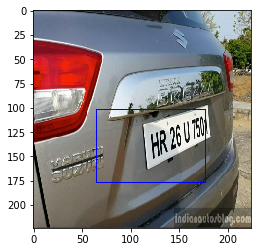

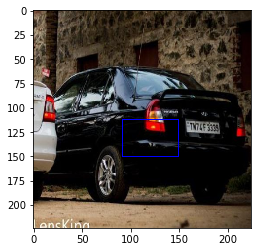

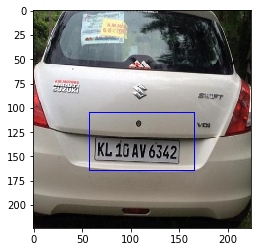

In [161]:
for i in range(0, len(Y_hat)):
    y_hat = Y_hat[i]
    img = X_test[i]
    show_test_image(img, y_hat)